In [1]:
# required for jupyter notebook
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize':(8,6)}) # set sns figure size

import os
import math

In [2]:
# df = pd.read_csv("/content/drive/MyDrive/all-station_raw.csv")

# read raw csv by marking missing values as NaN
missing_values = ['NIL', 'nil', '']
df = pd.read_csv(os.path.join('..', 'Datasets', 'brri-datasets', 'all-station_raw.csv'), 
                     na_values=missing_values)

df.head()

,Station,Year,Month,Day,Max Temp. (degree Celcius),Min Temp. (degree Celcius),Rainfall (mm),Actual Evaporation (mm),"Relative Humidity (morning, %)","Relative Humidity (afternoon, %)",Sunshine (hour/day),Cloudy (hour/day),Solar Radiation (cal/cm^2/day)
0,Barisal,2017,1,1,25.2,13.8,0.0,1.0,94.0,62.0,6.3,4.5,277.72
1,Barisal,2017,1,2,25.4,13.8,0.0,1.0,94.0,62.0,5.5,5.3,257.52
2,Barisal,2017,1,3,25.6,13.4,0.0,1.0,94.0,61.0,6.2,4.6,275.20
3,Barisal,2017,1,4,25.4,14.0,0.0,1.0,94.0,64.0,6.3,4.5,277.72
4,Barisal,2017,1,5,23.0,13.0,0.0,1.0,94.0,68.0,4.0,6.8,219.63


In [3]:
def rain_classifier(_df):
    df = _df.copy()
    
    data = df['Rainfall (mm)']
    arr = []
    arr_enc = []
    for x in data:
        if x=='NIL':
          arr.append('NIL')
          arr_enc.append('NIL')
        else:
          if float(x)==0.0:
            arr.append('no rain')
            arr_enc.append(0)
          elif float(x)>0.0 and float(x)<=20.0:
            arr.append('mild rain')
            arr_enc.append(1)
          elif float(x)>20.0:
            arr.append('medium to heavy rain')
            arr_enc.append(2)
          else: 
            # add NaN values as is
            arr.append(x)
            arr_enc.append(x)
            
    df['Rainfall Type'] = arr
    df['Rainfall Type (encoded)'] = arr_enc

    return df

In [4]:
df = rain_classifier(df)
df.head()

,Station,Year,Month,Day,Max Temp. (degree Celcius),Min Temp. (degree Celcius),Rainfall (mm),Actual Evaporation (mm),"Relative Humidity (morning, %)","Relative Humidity (afternoon, %)",Sunshine (hour/day),Cloudy (hour/day),Solar Radiation (cal/cm^2/day),Rainfall Type,Rainfall Type (encoded)
0,Barisal,2017,1,1,25.2,13.8,0.0,1.0,94.0,62.0,6.3,4.5,277.72,no rain,0.0
1,Barisal,2017,1,2,25.4,13.8,0.0,1.0,94.0,62.0,5.5,5.3,257.52,no rain,0.0
2,Barisal,2017,1,3,25.6,13.4,0.0,1.0,94.0,61.0,6.2,4.6,275.20,no rain,0.0
3,Barisal,2017,1,4,25.4,14.0,0.0,1.0,94.0,64.0,6.3,4.5,277.72,no rain,0.0
4,Barisal,2017,1,5,23.0,13.0,0.0,1.0,94.0,68.0,4.0,6.8,219.63,no rain,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Station                           4954 non-null   object 
 1   Year                              4954 non-null   int64  
 2   Month                             4954 non-null   int64  
 3   Day                               4954 non-null   int64  
 4   Max Temp. (degree Celcius)        4948 non-null   float64
 5   Min Temp. (degree Celcius)        4948 non-null   float64
 6   Rainfall (mm)                     4820 non-null   float64
 7   Actual Evaporation (mm)           4436 non-null   float64
 8   Relative Humidity (morning, %)    4950 non-null   float64
 9   Relative Humidity (afternoon, %)  4918 non-null   float64
 10  Sunshine (hour/day)               4939 non-null   float64
 11  Cloudy (hour/day)                 4767 non-null   float64
 12  Solar 

In [6]:
df['Rainfall Type'].value_counts()

no rain                 3280
mild rain               1097
medium to heavy rain     443
Name: Rainfall Type, dtype: int64

In [7]:
df['Rainfall Type (encoded)'].value_counts()

0.0    3280
1.0    1097
2.0     443
Name: Rainfall Type (encoded), dtype: int64

In [8]:
def show_corr_heatmap(df):
    # https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

    plt.figure(figsize=(20, 10))

    corr_matrix = df.corr()

    # mask to hide the upper triangle of the symmetric corr-matrix
    # mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

    heatmap = sns.heatmap(

        # correlation matrix
        corr_matrix,

        # mask the top triangle of the matrix
        # mask=mask,

        # two-contrast color, different color for + -
        cmap="PiYG",

        # color map range
        vmin=-1, vmax=1,

        # show corr values in the cells
        annot=True
    )

    # set a title
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=16);

    plt.show()

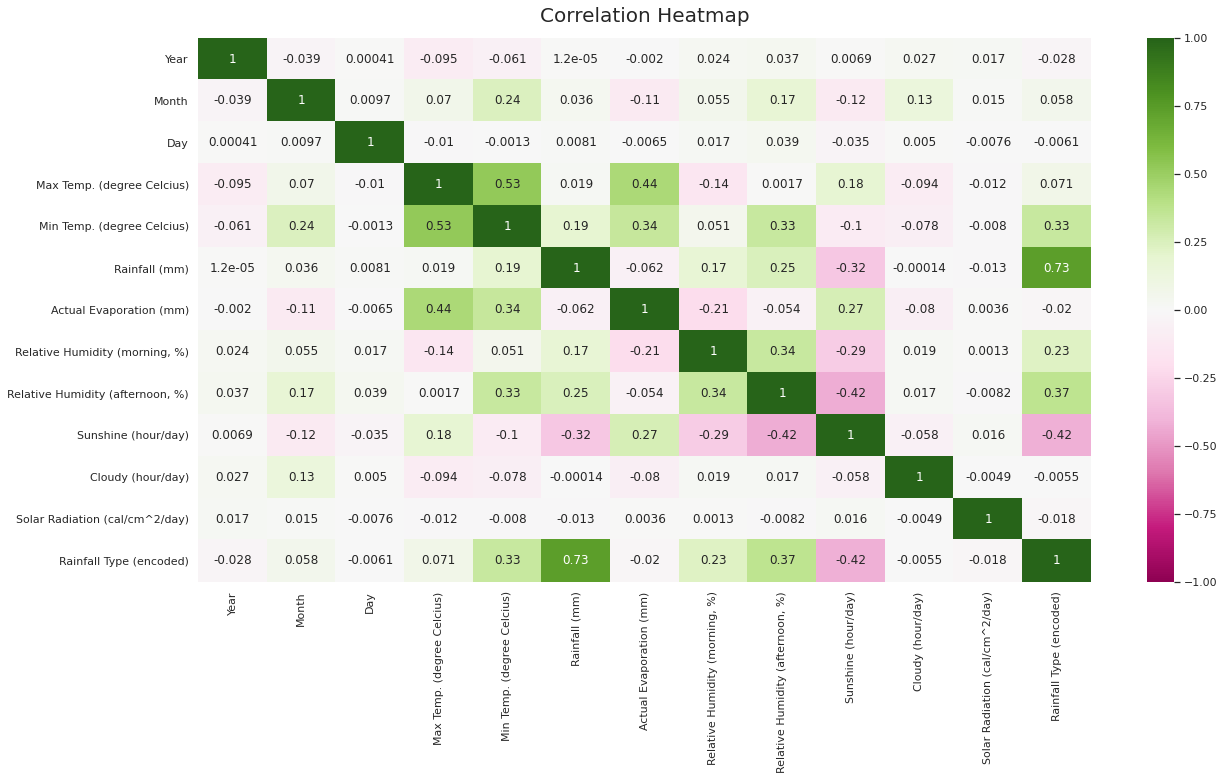

In [9]:
show_corr_heatmap(df)